In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sys
sys.path.insert(0, '/home/tomek/ib_tools/')
from indicators import get_signals

In [2]:
data = pd.read_pickle('freeze_df.pickle')

In [3]:
data

,backfill,open,high,low,close,price,ema_fast,atr,signal
date,,,,,,,,,
2019-10-01 02:20:30,True,7784.00,7791.50,7778.00,7780.75,7783.085269,7783.085269,13.500000,0.0
2019-10-01 03:03:00,True,7780.75,7817.75,7780.00,7815.00,7798.630623,7790.922718,25.776563,0.0
2019-10-01 03:46:30,True,7814.75,7821.00,7809.00,7811.25,7813.882936,7798.704032,21.069098,0.0
2019-10-01 05:46:30,True,7811.50,7816.50,7805.50,7816.00,7810.407487,7801.703445,18.456649,0.0
2019-10-01 08:06:30,True,7815.75,7816.50,7807.50,7815.50,7811.854182,7803.801823,16.469586,0.0
...,...,...,...,...,...,...,...,...,...
2019-10-04 07:41:30,True,7662.75,7685.50,7661.25,7670.00,7673.339793,7600.936107,13.661393,1.0
2019-10-04 08:18:30,True,7670.25,7674.75,7641.75,7653.00,7658.126782,7601.886921,14.139101,0.0
2019-10-04 09:01:00,True,7652.75,7663.50,7643.75,7644.00,7652.154018,7602.722547,14.277701,0.0


In [4]:
periods = [10, 20, 40, 80, ]

In [5]:
min_max = pd.DataFrame({'close': data.price})

In [6]:
min_max

,close
date,
2019-10-01 02:20:30,7783.085269
2019-10-01 03:03:00,7798.630623
2019-10-01 03:46:30,7813.882936
2019-10-01 05:46:30,7810.407487
2019-10-01 08:06:30,7811.854182
...,...
2019-10-04 07:41:30,7673.339793
2019-10-04 08:18:30,7658.126782
2019-10-04 09:01:00,7652.154018


In [7]:
for p in periods:
    min_max[f'min_{p}'] = min_max.close.rolling(p).min()
    min_max[f'max_{p}'] = min_max.close.rolling(p).max()

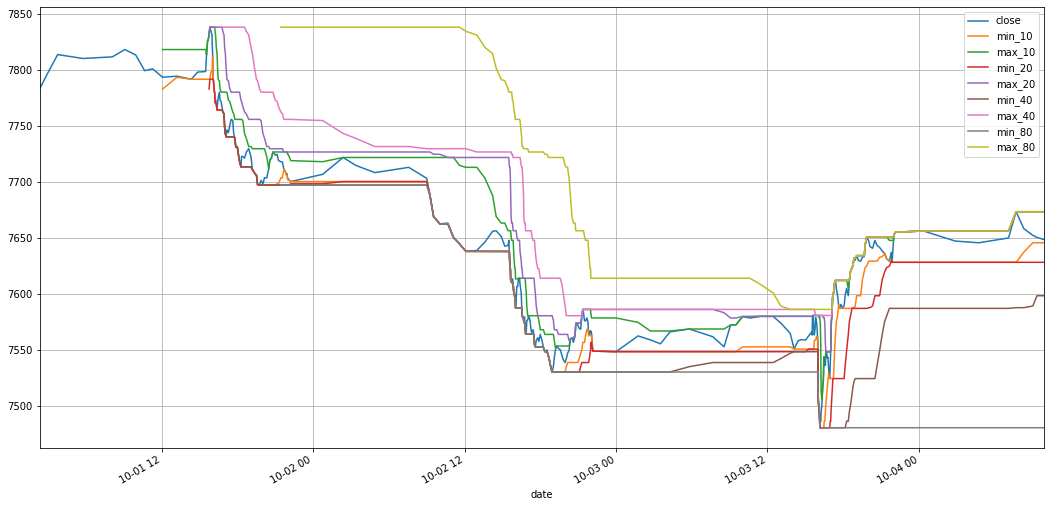

In [8]:
min_max.plot(figsize=(18, 9), grid=True);

In [9]:
data[data['signal'] != 0].loc['20190927':].head(50)

,backfill,open,high,low,close,price,ema_fast,atr,signal
date,,,,,,,,,
2019-10-01 15:50:00,True,7835.75,7841.50,7833.00,7840.00,7838.418019,7809.681818,13.991205,1.0
2019-10-01 16:05:30,True,7799.75,7799.75,7781.25,7790.00,7791.512304,7811.151043,15.090666,-1.0
2019-10-01 16:07:00,True,7790.00,7795.50,7781.25,7788.00,7790.486077,7810.235105,15.049435,-1.0
2019-10-01 16:10:00,True,7788.00,7789.25,7773.25,7778.00,7783.146335,7809.066911,15.094948,-1.0
2019-10-01 16:13:00,True,7777.75,7785.25,7766.25,7775.75,7778.881612,7807.798905,15.277684,-1.0
2019-10-01 16:14:30,True,7775.50,7776.25,7763.00,7767.00,7770.886004,7806.286815,15.184851,-1.0
2019-10-01 16:20:30,True,7775.75,7776.25,7760.00,7761.25,7769.385070,7803.586436,15.127293,-1.0
2019-10-01 16:24:00,True,7761.00,7769.00,7757.00,7766.50,7764.389513,7802.088766,14.992440,-1.0
2019-10-01 16:51:30,True,7766.50,7771.00,7752.75,7766.25,7762.614245,7795.267328,14.611367,-1.0


In [10]:
data[data['signal'] != 0].tail(60)

,backfill,open,high,low,close,price,ema_fast,atr,signal
date,,,,,,,,,
2019-10-02 15:44:00,True,7611.25,7615.50,7604.50,7614.25,7609.929355,7703.212133,14.161415,-1.0
2019-10-02 15:51:00,True,7617.50,7619.50,7602.50,7606.00,7609.784269,7699.716516,14.155038,-1.0
2019-10-02 15:53:30,True,7606.00,7608.50,7598.00,7598.75,7602.216113,7697.847797,14.059936,-1.0
2019-10-02 15:56:00,True,7598.50,7608.25,7595.25,7596.00,7601.915592,7696.013971,14.032394,-1.0
2019-10-02 15:59:00,True,7596.25,7601.50,7591.25,7597.75,7596.273608,7694.112268,13.934236,-1.0
2019-10-02 16:02:30,True,7591.00,7591.50,7581.50,7589.75,7587.332554,7690.310013,13.897170,-1.0
2019-10-02 16:34:00,True,7586.25,7586.75,7572.75,7578.25,7579.542868,7676.345046,13.908161,-1.0
2019-10-02 16:40:30,True,7576.00,7585.50,7572.00,7579.50,7577.466780,7672.762648,13.850094,-1.0
2019-10-02 16:42:00,True,7579.75,7580.75,7567.75,7575.50,7574.286590,7670.943185,13.828361,-1.0


In [11]:
averages = pd.DataFrame({'price': data.price,
                       'ema_fast': data.price.ewm(span=100).mean(),
                       'ema_slow': data.price.ewm(span=160).mean()})

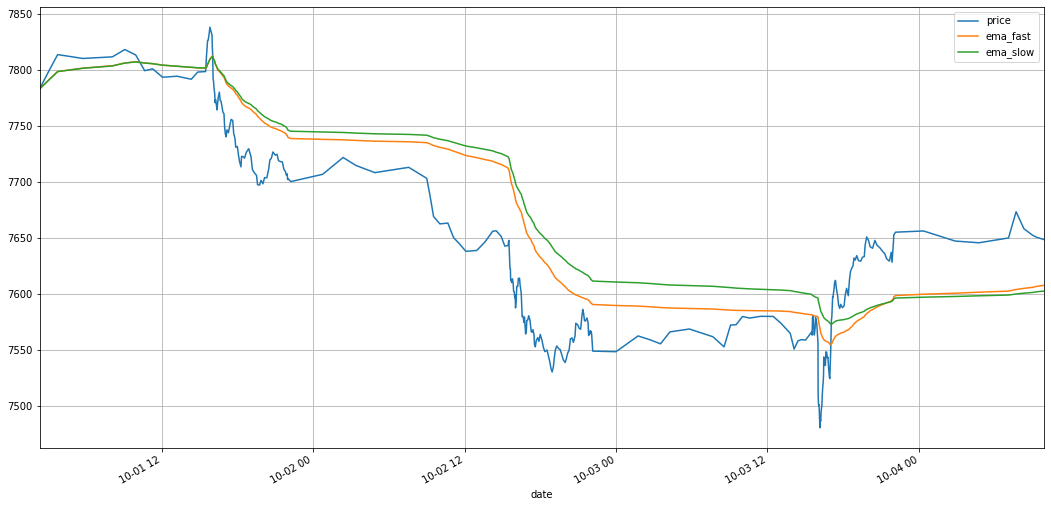

In [12]:
averages.plot(figsize=(18,9), grid=True);